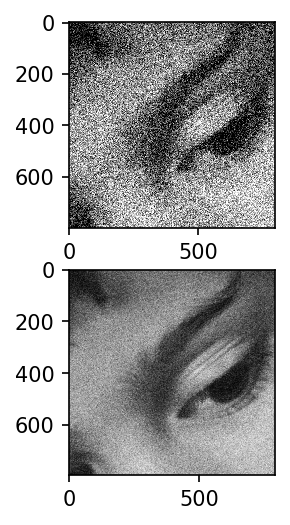

In [7]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
fig = plt.figure(dpi=150)


def convolve(f, kernel):
    m, n = kernel.shape

    y, x = f.shape
    y = y - m + 1
    x = x - m + 1
    g = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            g[i][j] = np.sum(f[i:i+m, j:j+n]*kernel)
    
    return g

im = imageio.imread('noisy.png')
im = im /255.
gaus = np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]])
gaus = gaus * 1/273

r = convolve(im[:,:,0], gaus)
g = convolve(im[:,:,1], gaus)
b = convolve(im[:,:,2], gaus)
im_out_test = np.dstack([r, g, b])

plt.subplot(2,1,1)
plt.imshow(im)  
plt.subplot(2,1,2)
plt.imshow(im_out_test)  
plt.show()